# MSDS 593 HW2
Submit this assignment on canvas as a pdf. All plots should be done in matplotlib. In general, use this advise when appropriate. (Taken from DataVizChecklist by Stephanie Evergreen & Ann K. Emery)

• 6-12 word descriptive title is left-justified in the upper left corner 

• Text size is hierarchical and readable

• Text is horizontal

• Proportions are accurate

• Data are intentionally ordered

• Color is used to highlight key patterns • Gridlines, if present, are muted

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches # for drawing shapes
from matplotlib import colors 
import math 
import mpl_toolkits.axisartist as axisartist
from matplotlib.axis import Axis

## 1. Redesign a bubble Chart

Review the part of Chapter 2 from “The Functional Art” where the au- thor talks about “The Bubble Plague.” Follow his redesign strategy of the “maker capitalization” plot to create a redesign of the bubble chart in this webpage https://www.visualcapitalist.com/top-100-companies- revenue-profit/. In your redesign use revenue and profits data for the top 10 global companies.

Dataset: Revenue and profits data from top 10 global companies https: //fortune.com/global500/2020/search/.

In [ ]:
data1 = {'Name': ['Walmart', 'Sinopec Group','State Grid','China National Petroleum',
                 'Royal Dutch Shell', 'Saudi Aramco','Volkswagen','BP','Amazon.com','Toyota Motor'],
        'Revenue': [523964, 407009, 383906, 379130, 352106, 329784, 282760, 282616, 280522, 275288], 
        'Profits': [14881.00, 6793.20, 7970.00, 4443.20, 15842.00, 88210.90, 15542.00, 4026.00, 11588.00, 19096.20]}
top_revenue = sorted(data1['Revenue'])
name = data1['Name']

#Set-up new dataframe
differ = []
for i in range(len(data1['Profits'])):
    sub_diff = data1['Revenue'][i]-data1['Profits'][i]
    differ.append(sub_diff) 

data1_d = pd.DataFrame(data1)
data1_d['Difference'] = differ

ratio =[]
for i in range(len(data1['Profits'])):
    sub_r = data1_d['Difference'][i]/data1['Revenue'][i]
    ratio.append(sub_r) 



data1_d['Ratio']=ratio

#Get Sorted Data
data1_s = data1_d.sort_values(by = ['Ratio'],ascending=True)
data1_s = data1_s.reset_index(drop = True)


name = data1_s['Name']
rev = data1_s['Revenue']
pro = data1_s['Profits']
ratio = data1_s['Ratio']

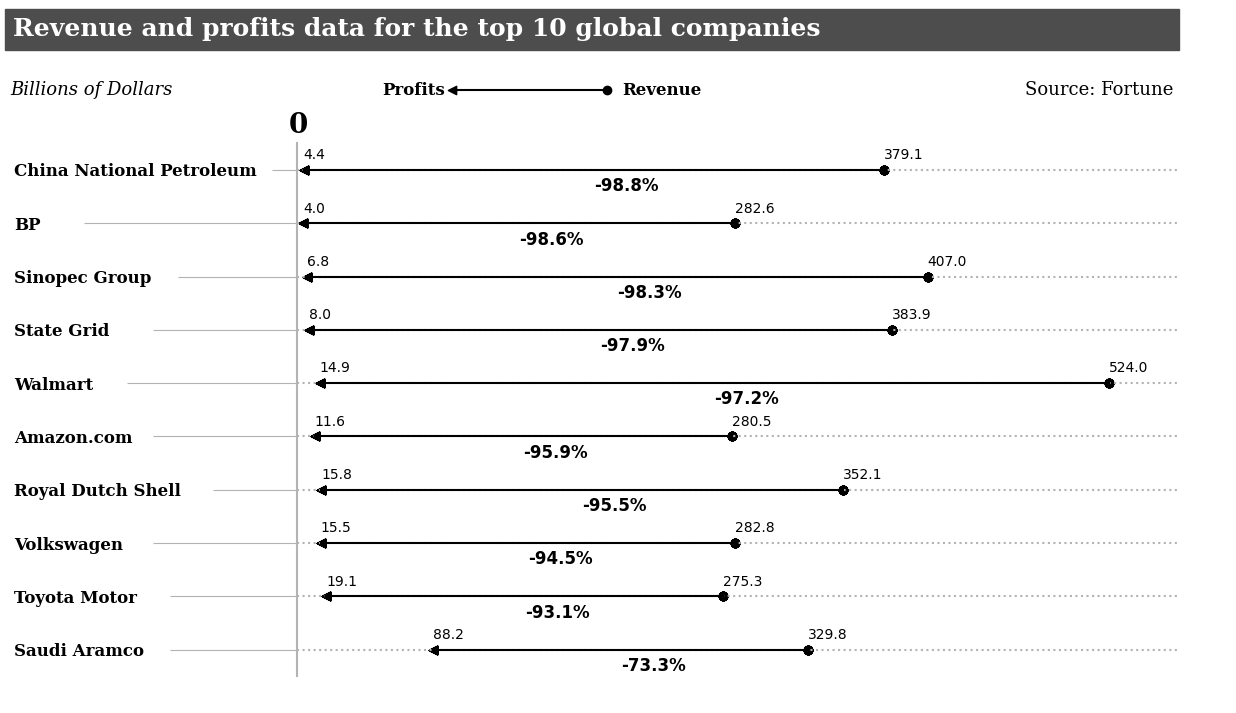

In [ ]:
plt.style.use('default')
fig, ax = plt.subplots(figsize = (12,9))

#################################### DEFINE FUNCTIONS ############################################
#Draw Arrows
def draw_arrows(left = data1['Profits'],right = data1['Revenue'],color = 'black'):
    for i, (profit, revenue) in enumerate(zip(left,right)):
        ax.plot([profit, revenue],[i,i],c=color)
        ax.scatter(right,list(range(0,10)),c=color)
        ax.scatter(left, list(range(0,10)),c=color, marker = '<',lw = 1)

#Draw Background lines
def bglines(color = '.7'):
    for i in enumerate(data1['Profits']):
        ax.plot([0,570000],[i,i], c = color, linestyle = 'dotted')
    
#Formating Numbers
def fmnum(num):
    num=num/1000
    fn = []
    for n in num:
        fn.append('{:.1f}'.format(n))        
    return fn

#Formating ratio
def fmperc(num=ratio):
    num=num*100
    fn = []
    for n in num:
        fn.append('-'+'{:.1f}'.format(n)+'%')        
    return fn
        
def horizontal_arrow(x = 100000, y = 10,lenth = 100000,color='black'):
    ax.plot([100000, x+100000],[y,y],c=color)
    ax.scatter(x+100000, y, c=color)
    ax.scatter(x, y, c=color, marker = '<',lw = 1)
###################################################################################################     

#Draw the basic
bglines()
draw_arrows(data1_s['Profits'],right = data1_s['Revenue'])

#Set x,y limits
ax.set_xlim(0,600000)
ax.set_ylim(-1,12)

#Remove boundaries
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticks([])

#Fonts
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Helvetica'}
ufont = {'fontname':'serif'}

#Y labels adjustment
ax.set_yticks(list(range(0,10)))
ax.spines['left'].set_color('.7')
ax.spines['left'].set_linewidth(1.5)
ax.spines['left'].set_bounds(-0.5,9.5)
yax = ax.get_yaxis()
yax.set_tick_params(pad = 200)
ax.set_yticklabels(name,horizontalalignment = 'left',**ufont,weight='bold',size=12)

for i, y in enumerate(ax.get_yaxis().get_ticklines()):
    a = len(name[i//2])
    yl = 215 - 8*a
    y.set_markersize(yl/1.3)
    y.set_color('.7')


#Title and descriptions
ax.set_title('Revenue and profits data for the top 10 global companies'+' '*40, c='white', 
                 loc='right', backgroundcolor='.3', fontsize=18,**ufont,
                 weight='bold').set_position([0.94,0.95])
horizontal_arrow(y=10.5)
ax.text(55000,10.4,'Profits', size=12,**ufont,weight='bold')
ax.text(210000,10.4,'Revenue',size=12,**ufont,weight='bold')
ax.text(-185000,10.4,'Billions of Dollars',size=13,**ufont,style = 'italic')
ax.text(470000,10.4,'Source: Fortune',size=13,**ufont)
ax.text(-5000,9.7,'0',size=20,**ufont,weight = 'bold')

#Annotations
fmpro = fmnum(pro)
fmrev = fmnum(rev)
fmratio = fmperc()

for i,(p,r) in enumerate(zip(pro,rev)):
    ax.text(p,i+0.2,fmpro[i])
    ax.text(r,i+0.2,fmrev[i])
    ax.text((p+r)/2,i-0.4,fmratio[i],weight='bold',size=12)
                        
plt.show()



## 2. Decluttering

Readings for this problem:

• “Storytelling with data.” Chapter 3.

• “Storytelling with data: let’s practice.” Chapter 3.

Follow the decluttering process described in “Storytelling with data” Chapter 3 to create a clean chart for the plot in Figure 1. Describe all the steps you took to modify the plot. Submit your description of the process, the code and the final plot.

## Description of the process:

1. Remove the chart borders and background shading
2. Remove Gridlines
3. Remove data markers
4. Clean up the axis labels so that they are easier to read. Reduce the numbers in the y-axis and abbreviate the months of the year so they can fit horizontally on the x-axis.
5. Label data directly next to the line and get rid of the legend
6. Make the data labels the same color as the data they are describing

In [11]:
#Shows monthly number of cars sold by national chain of dealership
data2 = {'2019':[101, 78, 91, 77, 78, 71, 78, 62, 68, 50, 43, 41], 
        '2018':[38, 47, 49, 42, 42, 38, 43, 52, 49, 67, 74, 86]}
months = ['January', 'February', 'March', 'April', 'May', 'June', 
                   'July', 'August', 'September', 'October', 'November','December']
months_simplified = [i[:3] for i in months]


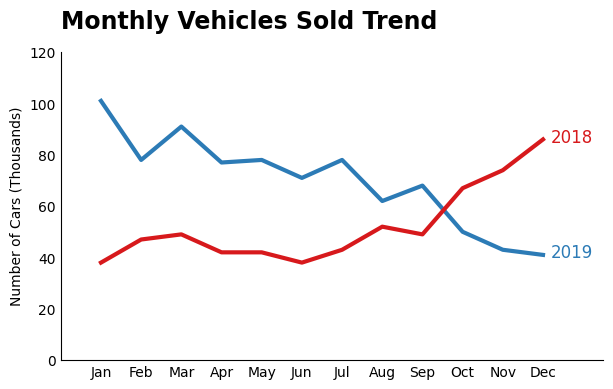

In [27]:
plt.style.use('default')
fig, ax = plt.subplots(figsize = (7,4))

ax.plot(months_simplified,data2['2019'],markersize = 6, 
        lw = 3, label = '2019',color = '#2c7bb6')
ax.plot(months_simplified,data2['2018'],markersize = 6, 
        lw = 3, label = '2018',color = '#d7191c')

ax.set_ylim(0,120)
ax.set_xlim(-1,12.5)

ax.set_ylabel('Number of Cars (Thousands)')
ax.text(11.2,85,'2018',size = 12,
       color = '#d7191c')
ax.text(11.2,40,'2019',size = 12,
       color = '#2c7bb6')

ax.tick_params(axis='both', which='both', length=0)
ax.set_title('Monthly Vehicles Sold Trend',  
                 loc='left',  fontsize=17,
                 weight='bold').set_position([0,1.05])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#plt.legend(loc= 'upper center',fontsize = 15,handletextpad =1)
plt.show()
